<a href="https://colab.research.google.com/github/RanojoyBiswas/Hotel-Booking-Analysis-EDA-/blob/main/Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Hotel Booking Analysis



### **Contributor**    - Ranajay Biswas
### **Project Type**    - EDA


## **Project Summary -**

In this project, we are going to perform exploratory data analysis on Hotel Booking data. We are given a data in csv format which has information about bookings of resorts and city hotels. The data contains many different variety of features and attributes. The data is from a wide demography covering multiple nations. This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

We are required to perform the right analysis on the data and come up with suggestions and insights that can be useful for the hotel business as well as helpful for the guests and families who are renting the hotel rooms.

We need to figure out which kind of metric to use, which kind of relationships are present in the features, where the businesses are lagging behind, which are the areas to improve etc.

## **GitHub Link -**

https://github.com/RanojoyBiswas/Hotel-Booking-Analysis-EDA-

## **Tableau Dashboard Link -**

https://public.tableau.com/app/profile/ranajay.biswas/viz/HotelBookingAnalysis-RanajayBiswas/Dashboard1?publish=yes

## **Problem Statement**


**Business Context**

Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions! This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. Explore and analyse the data to discover important factors that govern the bookings.

### **Business Objective :** 

* Understanding Guest patterns.
* Reduce number of cancellations.
* Find areas of potential growth.

## **Attributes :**

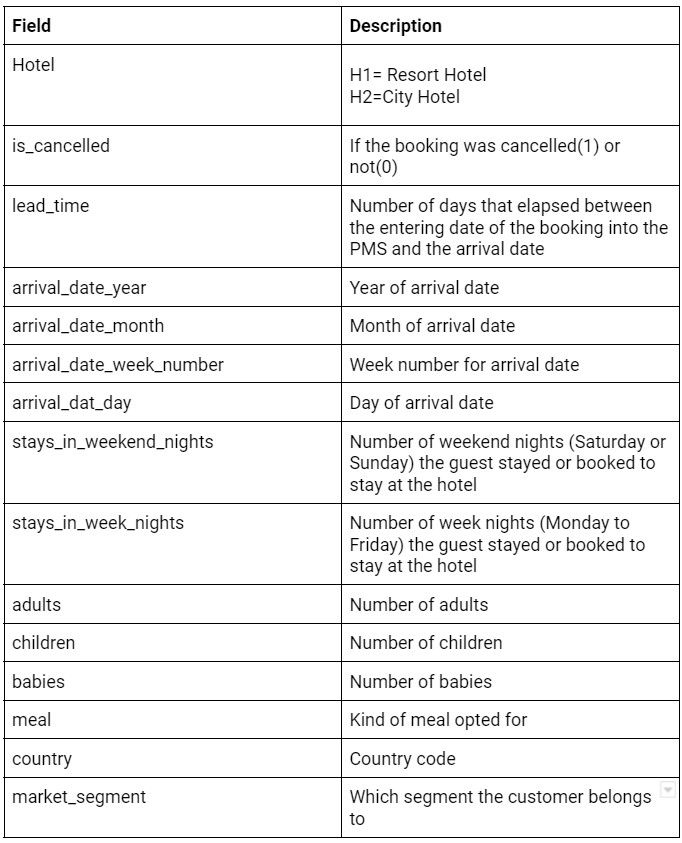



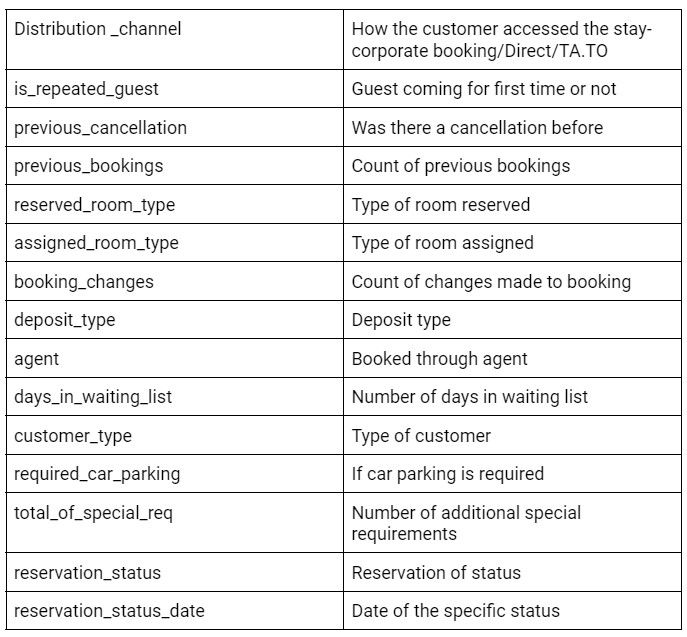

## **Data Collection & Summary:**

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import missingno as msno
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
sns.set(font_scale = 1.5)

In [ ]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# reading data set
dataset = pd.read_csv('/content/drive/MyDrive/Projects Almabetter EDA/Hotel Booking Analysis/Dataset/Hotel Bookings.csv',  encoding= 'unicode_escape')

In [ ]:
pd.set_option('display.max_columns', None)

Checking the data:

In [ ]:
# top 5 rows of the data
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# last 5 rows of the data
dataset.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
# checking the shape of our data
dataset.shape

(119390, 32)

In [ ]:
# checking columns
dataset.columns.tolist()

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [ ]:
# datatypes and null values overview
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### *Dataset has 119390 rows and 32 columns. And it contains object, integer and float data types*...

### <b>Descriptive Stats ---

In [ ]:
# descriptive statistics
dataset.describe(percentiles=[.1, .9])

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
10%,0.000000,3.000000,2015.000000,8.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,40.000000,0.000000,50.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
90%,1.000000,265.000000,2017.000000,46.000000,28.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,241.000000,390.400000,0.000000,164.000000,0.000000,2.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## **Exploratory Data Analysis:**


Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations. 

### *Discovering the null values in the data* ---

In [ ]:
def missing_value_checker(dataframe):

  '''this function takes a dataframe as input and returns the count 
      and percentage of data that are misssing in each column'''

  # checking the number of null values
  number_missing = dataframe.isnull().sum()

  # checking the number of null values
  percent_missing = round(dataframe.isnull().sum() * 100 / len(dataframe), 2)

  # dataframe containing the count & percentage
  dat = pd.DataFrame(list(zip(list(dataframe.columns), number_missing, percent_missing)) , columns =['feature','observations_missing', 'percentage_missing']).set_index('feature')

  return dat

In [ ]:
#  dataframe containing the exact number and percentage of missing values for each column
missing = missing_value_checker(dataset)
missing.sort_values('observations_missing', ascending = False)

,observations_missing,percentage_missing
feature,,
company,112593,94.31
agent,16340,13.69
country,488,0.41
children,4,0.00
reserved_room_type,0,0.00
assigned_room_type,0,0.00
booking_changes,0,0.00
deposit_type,0,0.00
hotel,0,0.00


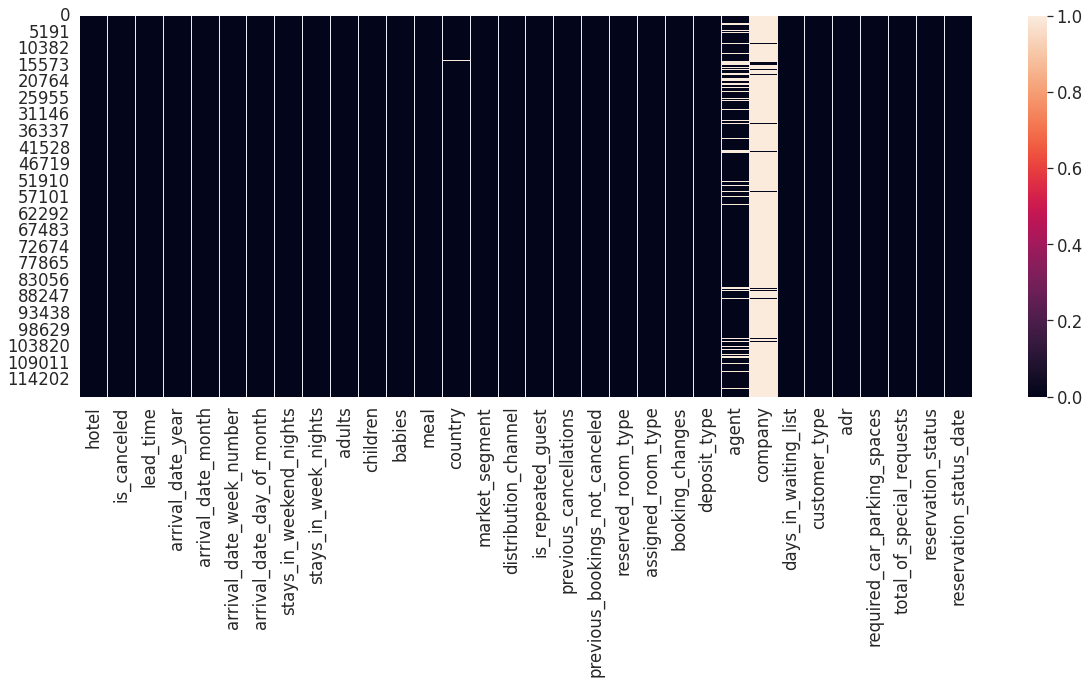

In [ ]:
# plotting for null values
plt.figure(figsize=(20,7))
sns.heatmap(dataset.isnull())

* Company column has more than 94% null values. We will have to drop this column from the data.

* Agent, Country and Children columns have missing values as well. But those numbers are low.

*Checking for duplicate values in the data..*

In [ ]:
# duplicate
len(dataset[dataset.duplicated()])

31994

In [ ]:
df = dataset.copy()

We have almost 32k duplicate observations.

In [ ]:
# dropping duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# after dropping duplicates
len(df[df.duplicated()])

0

Company column had more than 94% null values, so dropping that column.

In [ ]:
# dropping Company column
df.drop('company', axis = 1, inplace = True)

In [ ]:
#  dataframe containing the exact number and percentage of missing values for each column
missing = missing_value_checker(df)
missing.sort_values('observations_missing', ascending = False).head(5)

,observations_missing,percentage_missing
feature,,
agent,12193,13.95
country,452,0.52
children,4,0.00
hotel,0,0.00
previous_cancellations,0,0.00


### Null values Imputation :

Agent column :

In [ ]:
def dist_box_plot(label, dataset, size = (15,7)):

  ''' A function to plot the distribution 
  and histograms of binned data'''

  bins = "auto"
  x = np.array(df[label])
  sns.set(font_scale = 1.5)

  fig, ax = plt.subplots(1, 2, sharex=True, figsize=size, constrained_layout=True)
  sns.distplot(dataset[label],color="b", ax=ax[0])
  ax[0].set_title(f"Distribution of {label} column")

  ax[1] = sns.boxplot(data=dataset, x=label)

  ax[1].set_title(f'Boxplot for {label} column')
  # ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
  plt.show()

Checking distributions:

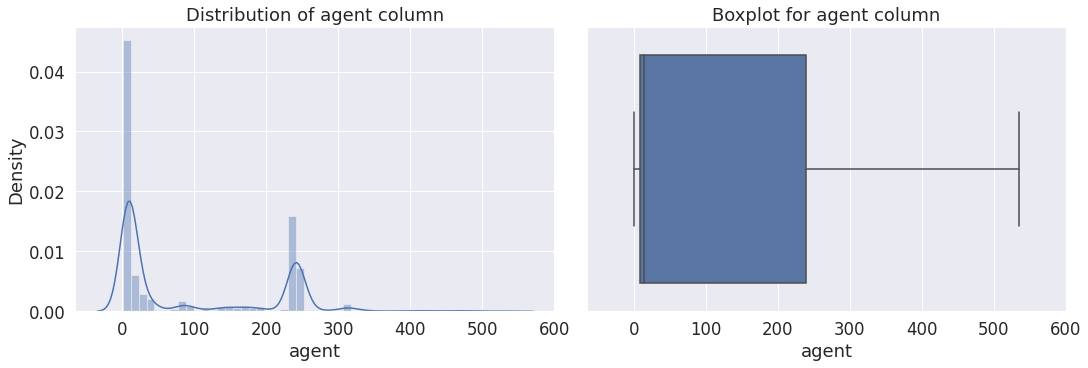

In [ ]:
dist_box_plot('agent', df, (15,5))

We have positive skewness. So, we will impute the missing values in this column with the median value.

In [ ]:
df['agent'].fillna(df['agent'].median(), inplace = True)

In [ ]:
df['agent'].isnull().sum()

0

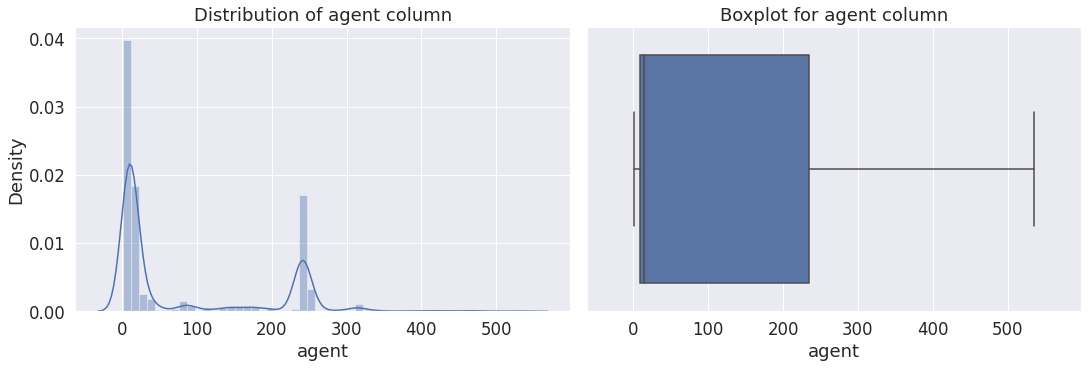

In [ ]:
dist_box_plot('agent', df, (15,5))

Applying Log transformation on Agent column:

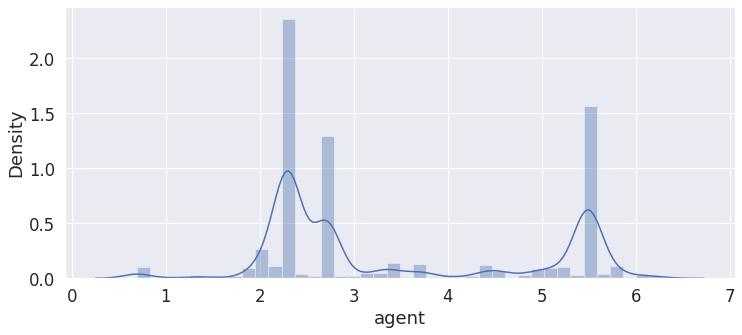

In [ ]:
plt.figure(figsize = (12,5))
sns.distplot(np.log1p(df['agent']),color="b")

### Country is object type. So, imputing the missing values with the 1st mode value

In [ ]:
df['country'].fillna(df['country'].mode()[0], inplace = True)

In [ ]:
df['country'].isnull().sum()

0

### For Children column --

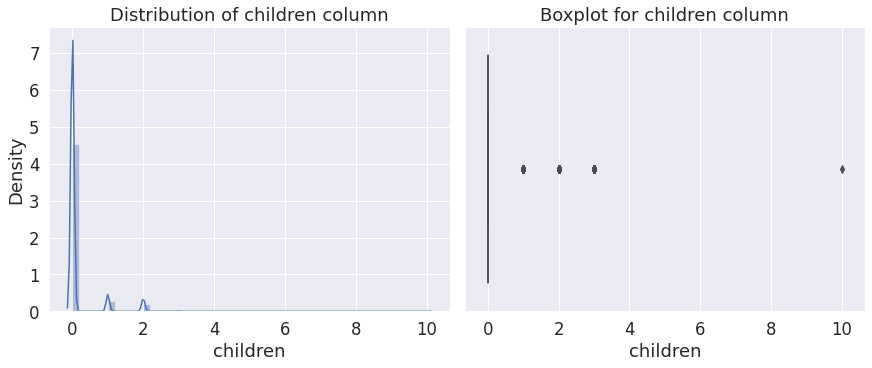

In [ ]:
dist_box_plot('children', df, (12,5))

Applying Log transformation on Children column:

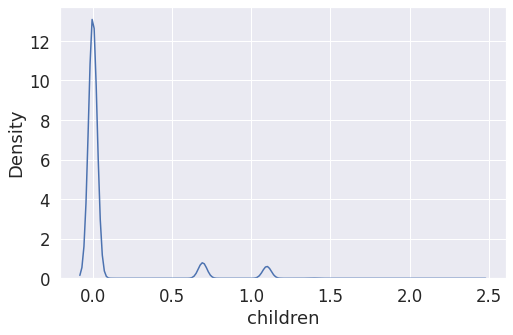

In [ ]:
plt.figure(figsize = (8,5))
sns.kdeplot(np.log1p(df['children']),color="b")

Children column has high right skewness. So, will be imputing the nulls with the median

In [ ]:
df['children'].fillna(df['children'].median(), inplace = True)

### Let's check if there are any null values now..

In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

Great, we do not any more null values.

In [ ]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
